## Evaluasi Model (Confussion Matriks)

c:\Users\Ghassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Ghassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


📊 Evaluasi Model DenseNet121
Accuracy  : 92.31%
Loss      : 0.2383
Precision : 0.9181
Recall    : 0.9292
F1 Score  : 0.9216


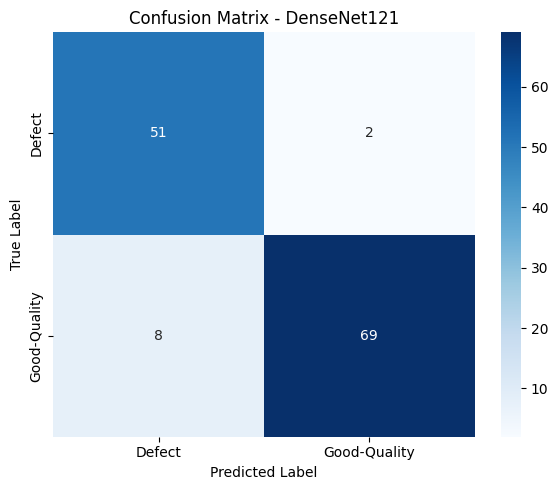

In [1]:
#Confusion Matriks DenseNet121
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path dataset dan model
test_dir = r"D:\SKRIPSI\Project\dataset-kopi-warga\testing"
model_path = "model_densenet121_V-30.pth"

# Transformasi data
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset testing
test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
class_names = test_dataset.classes
num_classes = len(class_names)

# Load model DenseNet121
model = models.densenet121(pretrained=False)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# Loss function
criterion = nn.CrossEntropyLoss()

# Evaluasi model
total_loss, correct, total = 0.0, 0, 0
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Hitung metrik evaluasi
accuracy = correct / total
precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
avg_loss = total_loss / len(test_loader)

# Tampilkan hasil evaluasi
print(f"📊 Evaluasi Model DenseNet121")
print(f"Accuracy  : {accuracy * 100:.2f}%")
print(f"Loss      : {avg_loss:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - DenseNet121")
plt.tight_layout()
plt.show()


c:\Users\Ghassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Ghassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


📊 Evaluasi Model EfficientNetB0
Accuracy  : 96.92%
Loss      : 0.1464
Precision : 0.9681
Recall    : 0.9681
F1 Score  : 0.9681


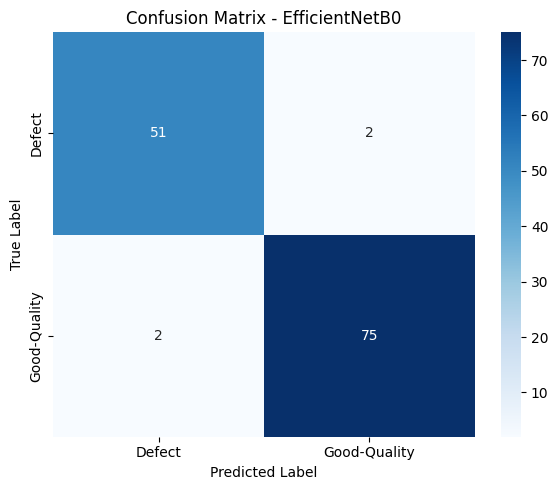

In [2]:
#Confusion Matriks EfficientNetB0
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path dataset dan model
test_dir = r"D:\SKRIPSI\Project\dataset-kopi-warga\testing"
model_path = "model_efficientNetB0_V-30.pth"

# Transformasi data
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset testing
test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
class_names = test_dataset.classes
num_classes = len(class_names)

# Load model EfficientNetB0
model = models.efficientnet_b0(pretrained=False)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# Loss function
criterion = nn.CrossEntropyLoss()

# Evaluasi model
total_loss, correct, total = 0.0, 0, 0
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Hitung metrik evaluasi
accuracy = correct / total
precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
avg_loss = total_loss / len(test_loader)

# Tampilkan hasil evaluasi
print(f"📊 Evaluasi Model EfficientNetB0")
print(f"Accuracy  : {accuracy * 100:.2f}%")
print(f"Loss      : {avg_loss:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - EfficientNetB0")
plt.tight_layout()
plt.show()


c:\Users\Ghassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Ghassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


📊 Evaluasi Model MobileNetV2
Accuracy  : 94.62%
Loss      : 0.0815
Precision : 0.9418
Recall    : 0.9487
F1 Score  : 0.9447


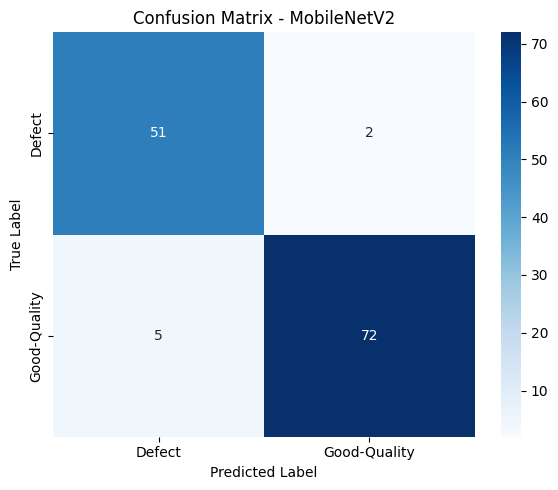

In [3]:
#Confusion Matrisk MobileNetV2
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path dataset dan model
test_dir = r"D:\SKRIPSI\Project\dataset-kopi-warga\testing"
model_path = "model_mobileNetV2_V-30.pth"

# Transformasi data
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset testing
test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
class_names = test_dataset.classes
num_classes = len(class_names)

# Load model MobileNetV2
model = models.mobilenet_v2(pretrained=False)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# Loss function
criterion = nn.CrossEntropyLoss()

# Evaluasi model
total_loss, correct, total = 0.0, 0, 0
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Hitung metrik evaluasi
accuracy = correct / total
precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
avg_loss = total_loss / len(test_loader)

# Tampilkan hasil evaluasi
print(f"📊 Evaluasi Model MobileNetV2")
print(f"Accuracy  : {accuracy * 100:.2f}%")
print(f"Loss      : {avg_loss:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MobileNetV2")
plt.tight_layout()
plt.show()

c:\Users\Ghassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Ghassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


📊 Evaluasi Model ResNet50
Accuracy  : 90.77%
Loss      : 0.2296
Precision : 0.9052
Recall    : 0.9191
F1 Score  : 0.9066


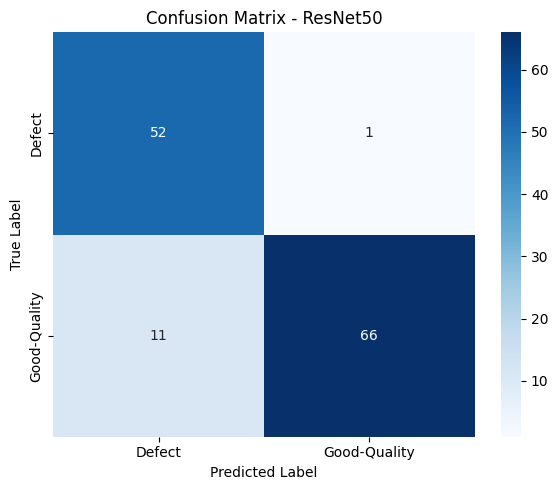

In [4]:
#Confusion Matriks Resnet50
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path dataset dan model
test_dir = r"D:\SKRIPSI\Project\dataset-kopi-warga\testing"
model_path = "model_resnet50_V-30.pth"

# Transformasi data
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset testing
test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
class_names = test_dataset.classes
num_classes = len(class_names)

# Load model ResNet50
model = models.resnet50(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# Loss function
criterion = nn.CrossEntropyLoss()

# Evaluasi model
total_loss, correct, total = 0.0, 0, 0
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Hitung metrik evaluasi
accuracy = correct / total
precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
avg_loss = total_loss / len(test_loader)

# Tampilkan hasil evaluasi
print(f"📊 Evaluasi Model ResNet50")
print(f"Accuracy  : {accuracy * 100:.2f}%")
print(f"Loss      : {avg_loss:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - ResNet50")
plt.tight_layout()
plt.show()


c:\Users\Ghassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Ghassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\timm\models\_factory.py:126: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(


📊 Evaluasi Model Xception
Accuracy  : 96.92%
Loss      : 0.1272
Precision : 0.9649
Recall    : 0.9740
F1 Score  : 0.9685


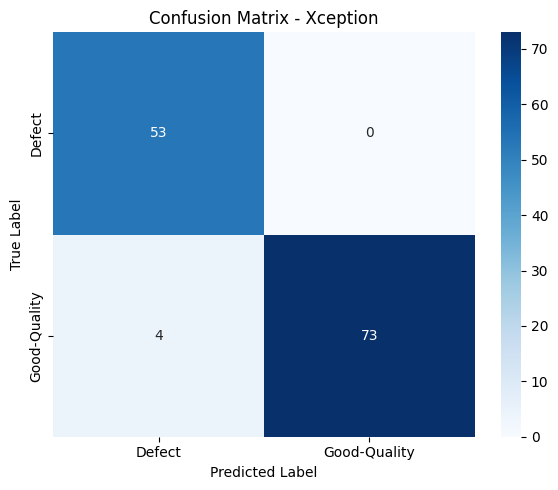

In [5]:
#Confusion Matriks Xception
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import timm

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path dataset dan model
test_dir = r"D:\SKRIPSI\Project\dataset-kopi-warga\testing"
model_path = "model_xception_V-30.pth"

# Transformasi data
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset testing
test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
class_names = test_dataset.classes
num_classes = len(class_names)

# Load model Xception dari timm
model = timm.create_model('xception', pretrained=False, num_classes=num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# Loss function
criterion = nn.CrossEntropyLoss()

# Evaluasi model
total_loss, correct, total = 0.0, 0, 0
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Hitung metrik evaluasi
accuracy = correct / total
precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
avg_loss = total_loss / len(test_loader)

# Tampilkan hasil evaluasi
print(f"📊 Evaluasi Model Xception")
print(f"Accuracy  : {accuracy * 100:.2f}%")
print(f"Loss      : {avg_loss:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Xception")
plt.tight_layout()
plt.show()
